In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from crmp import CRMP

'/Users/akhilpotla/ut/research/crm/crm/examples/crmp.py'

In [3]:
df = pd.read_csv('sample_data.csv')
df

,time,fixed_inj1,net_fixed_inj1,fixed_inj2,net_fixed_inj2,Prod1,Net_Prod1,Prod2,Net_Prod2,Prod3,Net_Prod3,Prod4,Net_Prod4
0,1,818.969148,818.969148,624.763115,624.763115,322.898503,322.898503,444.030260,444.030260,134.372488,134.372488,15.447568,15.447568
1,2,348.066591,1167.035739,609.580654,1234.343769,436.943476,759.841979,482.554701,926.584961,192.070440,326.442928,23.069531,38.517099
2,3,526.344228,1693.379967,450.454029,1684.797797,450.902854,1210.744833,481.451908,1408.036869,247.161374,573.604303,32.734493,71.251592
3,4,1044.195126,2737.575093,458.553023,2143.350820,511.617980,1722.362813,615.055618,2023.092487,349.175521,922.779824,50.443457,121.695049
4,5,882.342469,3619.917562,435.225079,2578.575899,517.958436,2240.321248,614.433875,2637.526361,413.402839,1336.182663,65.145458,186.840507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,881.621650,113340.795718,348.983598,73564.783389,511.083159,80980.717309,562.140327,89148.035744,680.621151,94356.259475,698.553113,70806.049919
146,147,714.163154,114054.958872,524.997524,74089.780914,536.262602,81516.979911,586.491791,89734.527536,672.985320,95029.244796,698.113066,71504.162986
147,148,428.606437,114483.565309,479.041732,74568.822646,503.511716,82020.491627,505.817925,90240.345461,632.343891,95661.588687,692.976215,72197.139200
148,149,1104.753516,115588.318824,440.161100,75008.983746,537.362249,82557.853876,632.355908,90872.701368,669.789162,96331.377848,698.497989,72895.637189


In [4]:
time = df['time'].to_numpy()

inj1 = df['fixed_inj1'].to_numpy()
inj2 = df['fixed_inj2'].to_numpy()

prod1 = df['Prod1'].to_numpy()
prod2 = df['Prod2'].to_numpy()
prod3 = df['Prod3'].to_numpy()
prod4 = df['Prod4'].to_numpy()

Text(0.5, 1.0, 'Producer 1: Production Rate vs Time')

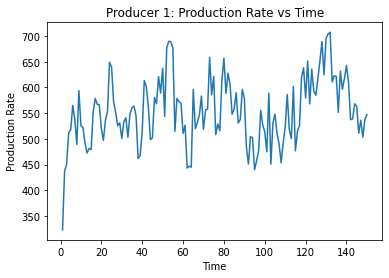

In [5]:
plt.plot(time, prod1)
plt.xlabel('Time')
plt.ylabel('Production Rate')
plt.title('Producer 1: Production Rate vs Time')

### Preparing the data

We are now ready to put our data into a format where we can `fit` and `predict` with it.

The feature matrix should have it's first column as the production rate for all but the last time step. The last two columns should be the injector rates for the same time steps. The target vector should be the production rate for all but the first time step since that will ensure we are solving for the production rates on the following time step.

In [6]:
X = np.array([inj1[:-1], inj2[:-1]]).T
y = prod1[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print('X_train: ', X_train.shape)

X_train:  (119, 2)


Just like all Scikit-Learn estimators we fit the model with `fit`, and we perform predictions with `predict`.

In [7]:
crmp = CRMP().fit(X=X_train, y=y_train)
print('Tau: ', crmp.tau_)
print('Gains: ', crmp.gains_)

Tau:  1.4999997152233744
Gains:  [0.2000001 0.7999999]


In [51]:
y_hat = crmp.predict(X_test)
y_hat

array([252.12153463, 483.37297701, 481.58406501, 591.37585606,
       570.3615132 , 573.07818056, 610.77314932, 648.80450102,
       687.64973851, 623.94303757, 694.95253336, 703.60874928,
       707.30410877, 610.64577471, 622.8325706 , 621.31399615,
       551.5601638 , 632.00117912, 596.30022716, 617.48621546,
       642.60604409, 610.03552053, 537.35172262, 538.69484593,
       568.27506983, 563.75057737, 511.08317206, 536.26262161,
       503.51171931, 537.3622875 ])

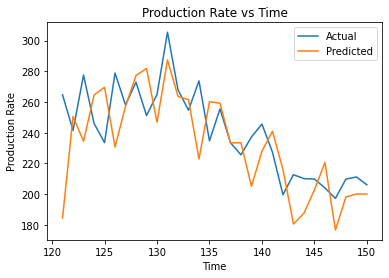

In [8]:
plt.plot(time[(len(X_train) + 1):], y_test)
plt.plot(time[(len(X_train) + 1):], y_hat)
plt.xlabel('Time')
plt.ylabel('Production Rate')
plt.title('Production Rate vs Time')
plt.legend(['Actual', 'Predicted'])

In [9]:
print('MSE: ', mean_squared_error(y_hat, y_test))

MSE:  474.98198543091735


### Practice

Ok, now you have seen that example, it is time to use CRM on the other wells. Just like you would with any other Scikit-Learn estimator, you need to construct a feature matrix and a target vector.